## Import all essential libraries required for data preprocessing, modeling, and interpretability in this experiment

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

## Load the data

In [99]:
df = pd.read_csv("breast_cancer.csv")

##  View the first 5 rows

In [100]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Check column types and null values

In [101]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

## Summary statistics for numerical columns

In [102]:
df.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


## Check for Missing Values

In [103]:
df.isnull().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

## Convert 'Survival Months' to numeric (if applicable)

In [104]:
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')

## Drop rows with missing survival months

In [105]:
df.dropna(subset=['Survival Months'], inplace=True)

## Create binary target variable: survived >= 5 years or not

In [106]:
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

In [107]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival_5yr
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive,0
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead,0
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead,0
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead,0


## Drop original survival columns to avoid leakage and Strip whitespace in column names

In [108]:
df.drop(['Status', 'Survival Months'], axis=1, inplace=True)
df.columns = df.columns.str.strip()

## Identify categorical columns, One-hot encode categorical columns and  Define features and target

In [109]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('Survival_5yr', axis=1)
y = df_encoded['Survival_5yr']

## Train-Test Split the dataset

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##  Standardize Features 

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\yeman\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\yeman\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\yeman\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## Train XGBoost, Predict and evaluate the dataset

In [112]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report for XGBoost Model:\n")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for XGBoost Model:

              precision    recall  f1-score   support

           0       0.38      0.18      0.24       241
           1       0.71      0.88      0.79       564

    accuracy                           0.67       805
   macro avg       0.55      0.53      0.52       805
weighted avg       0.62      0.67      0.62       805

ROC-AUC: 0.5192534063152938


## Plot ROC Curves

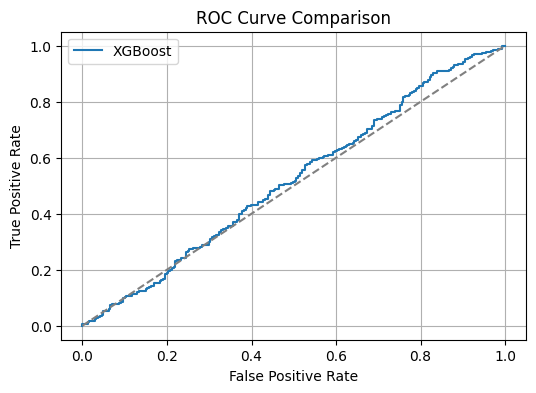

In [113]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(6, 4))

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

## Top 10 Feature Importances XGBoost

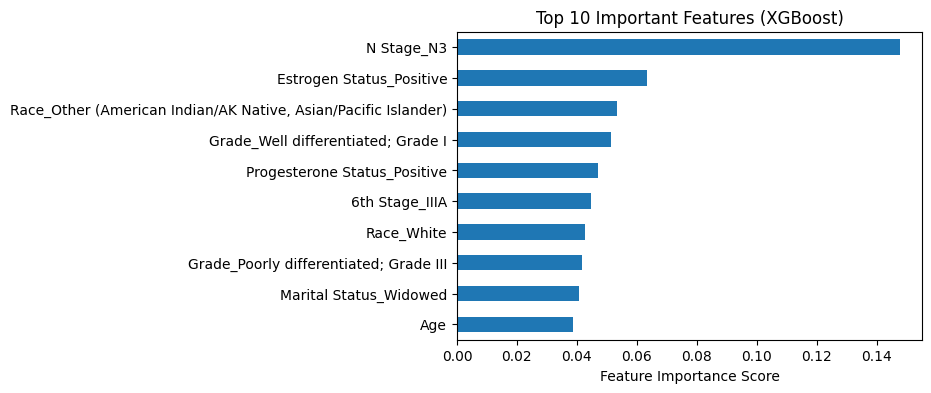

Classification Report for XGBoost Model for top 10:

              precision    recall  f1-score   support

           0       0.38      0.18      0.24       241
           1       0.71      0.88      0.79       564

    accuracy                           0.67       805
   macro avg       0.55      0.53      0.52       805
weighted avg       0.62      0.67      0.62       805



In [114]:
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
top10_xgb = importances_xgb.sort_values(ascending=False).head(10)

top10_xgb.plot(kind='barh', title='Top 10 Important Features (XGBoost)', figsize=(6, 4))
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance Score')
plt.show()
print("Classification Report for XGBoost Model for top 10:\n")
print(classification_report(y_test, y_pred_xgb))

## Top 5 Feature Importances XGBoost

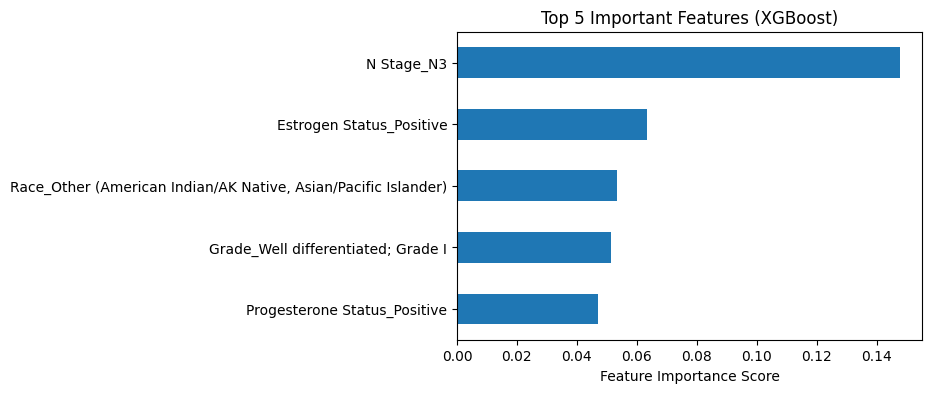

Classification Report for XGBoost Model for top 5:

              precision    recall  f1-score   support

           0       0.38      0.18      0.24       241
           1       0.71      0.88      0.79       564

    accuracy                           0.67       805
   macro avg       0.55      0.53      0.52       805
weighted avg       0.62      0.67      0.62       805



In [115]:
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
top5_xgb = importances_xgb.sort_values(ascending=False).head(5)

top5_xgb.plot(kind='barh', title='Top 5 Important Features (XGBoost)', figsize=(6, 4))
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance Score')
plt.show()
print("Classification Report for XGBoost Model for top 5:\n")
print(classification_report(y_test, y_pred_xgb))

##  Split the dataset and Define parameter grid for XGBoost

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 1]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model

In [117]:
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Feature importance and 

In [118]:
importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
top10_features = importances.sort_values(ascending=False).head(10).index
top5_features = importances.sort_values(ascending=False).head(5).index

## Evaluate top 10 top 5 features

In [119]:
best_xgb.fit(X_train[top10_features], y_train)
y_pred_10 = best_xgb.predict(X_test[top10_features])
print("Classification Report for Top 10 Features:")
print(classification_report(y_test, y_pred_10))

best_xgb.fit(X_train[top5_features], y_train)
y_pred_5 = best_xgb.predict(X_test[top5_features])
print("Classification Report for Top 5 Features:")
print(classification_report(y_test, y_pred_5))

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:06:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for Top 10 Features:
              precision    recall  f1-score   support

           0       0.65      0.05      0.09       241
           1       0.71      0.99      0.83       564

    accuracy                           0.71       805
   macro avg       0.68      0.52      0.46       805
weighted avg       0.69      0.71      0.60       805

Classification Report for Top 5 Features:
              precision    recall  f1-score   support

           0       0.83      0.02      0.04       241
           1       0.70      1.00      0.83       564

    accuracy                           0.71       805
   macro avg       0.77      0.51      0.43       805
weighted avg       0.74      0.71      0.59       805



## Apply Cross-validation score

# Feature importance from initial model

In [122]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

importances = pd.Series(xgb_clf.feature_importances_, index=X.columns)
top10_features = importances.sort_values(ascending=False).head(10).index
top5_features = importances.sort_values(ascending=False).head(5).index

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## GridSearch parameters

In [124]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

## Cross-validation score and Visualizations

In [130]:
def evaluate_model(X_subset, y, features, title):
    X_train_sub = X_subset[features]
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train_sub, y, stratify=y, test_size=0.2, random_state=42)

    grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                               param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_part, y_train_part)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_part)

    print(f"\nBest Parameters for {title}:")
    print(grid_search.best_params_)
    print(f"\nClassification Report for {title}:")
    print(classification_report(y_test_part, y_pred))

    scores = cross_val_score(best_model, X_train_sub, y, cv=5, scoring='roc_auc')
    print(f"Mean ROC-AUC (CV): {scores.mean():.4f} ± {scores.std():.4f}")

    ConfusionMatrixDisplay.from_estimator(best_model, X_test_part, y_test_part)
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    RocCurveDisplay.from_estimator(best_model, X_test_part, y_test_part)
    plt.title(f"ROC Curve - {title}")
    plt.show()

## Evaluate top 10 features

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters for Top 10 Features (XGBoost):
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

Classification Report for Top 10 Features (XGBoost):
              precision    recall  f1-score   support

           0       0.67      0.02      0.05       241
           1       0.70      0.99      0.82       564

    accuracy                           0.70       805
   macro avg       0.69      0.51      0.44       805
weighted avg       0.69      0.70      0.59       805



C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mean ROC-AUC (CV): 0.5392 ± 0.0509


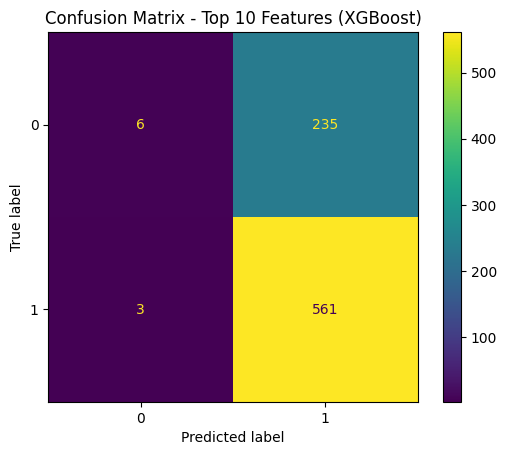

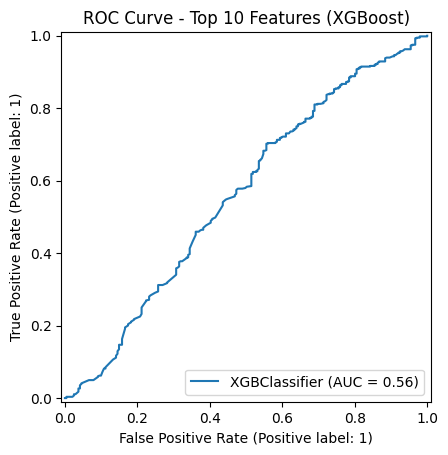

In [131]:
evaluate_model(X, y, top10_features, "Top 10 Features (XGBoost)")

## Evaluate top 5 features

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters for Top 5 Features (XGBoost):
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

Classification Report for Top 5 Features (XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.02      0.04       241
           1       0.70      1.00      0.83       564

    accuracy                           0.71       805
   macro avg       0.77      0.51      0.43       805
weighted avg       0.74      0.71      0.59       805



C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:32:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mean ROC-AUC (CV): 0.5372 ± 0.0670


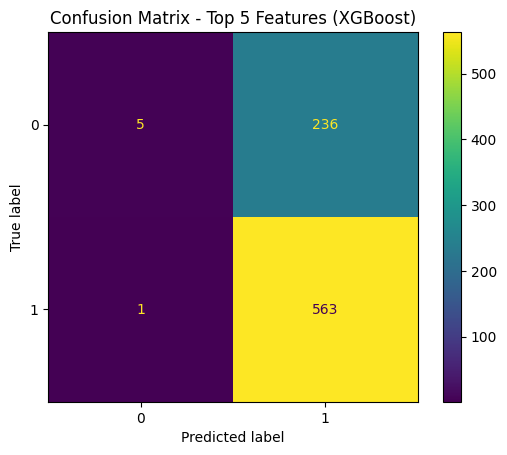

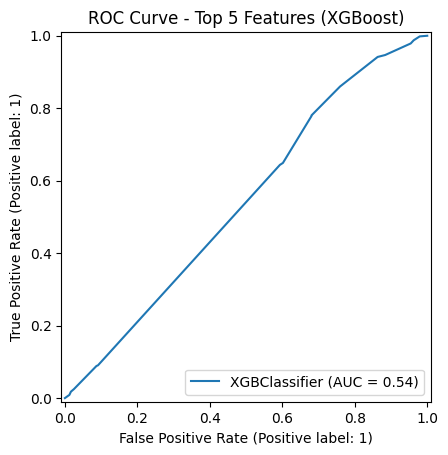

In [132]:
evaluate_model(X, y, top5_features, "Top 5 Features (XGBoost)")